# Chapter 19: Beyond Vanilla Networks

## The CIFAR-10 Dataset

### What CIFAR-10 Looks Like

In [1]:
%matplotlib inline

170500096/170498071 [==============================] - 2s 0us/step


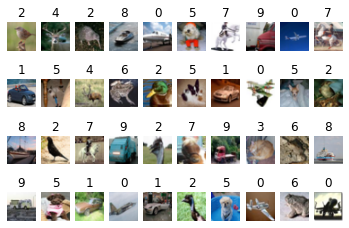

In [2]:
# Plot sample images from CIFAR-10

from keras.datasets import cifar10
import matplotlib.pyplot as plt
import random

# Load CIFAR-10
(X, Y), (_, _) = cifar10.load_data()

# Print a 4x10 grid of images
ROWS = 4
COLUMNS = 10
for i in range(ROWS * COLUMNS):
    ax = plt.subplot(ROWS, COLUMNS, i + 1)  # Get the next cell in the grid
    ax.axis('off')                          # Remove ticks on axes
    idx = random.randint(0, X.shape[0])     # Select a random image
    ax.set_title(Y[idx][0])                 # Print the image's label
    ax.imshow(X[idx])                       # Show the image
plt.show()

### set gpu

In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


### Falling Short of CIFAR

In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam
from keras.initializers import glorot_normal
from keras.utils import to_categorical

In [6]:
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = cifar10.load_data()
X_train = X_train_raw.reshape(X_train_raw.shape[0], -1) / 255
X_test_all = X_test_raw.reshape(X_test_raw.shape[0], -1) / 255
X_validation, X_test = np.split(X_test_all, 2)
Y_train = to_categorical(Y_train_raw)
Y_validation, Y_test = np.split(to_categorical(Y_test_raw), 2)

In [7]:
model = Sequential()
model.add(Dense(1200, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(500, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
with tf.device('/device:GPU:0'):
    history = model.fit(X_train, Y_train,
                    validation_data=(X_validation, Y_validation),
                    epochs=25, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 9s 4ms/step - loss: 1.9029 - accuracy: 0.3263 - val_loss: 1.8270 - val_accuracy: 0.3498
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6252 - accuracy: 0.4177 - val_loss: 1.8261 - val_accuracy: 0.3514
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5414 - accuracy: 0.4492 - val_loss: 1.6344 - val_accuracy: 0.4196
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4779 - accuracy: 0.4730 - val_loss: 1.4659 - val_accuracy: 0.4842
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4181 - accuracy: 0.4952 - val_loss: 1.4994 - val_accuracy: 0.4688
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3674 - accuracy: 0.5111 - val_loss: 1.4861 - val_accuracy: 0.4838
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3339 - accuracy: 0.5253 - val_loss: 1.5613 - val_accuracy:

## Running on Convolutions

In [10]:
from keras.layers import Conv2D, Dropout
from keras.layers import BatchNormalization, Flatten

In [11]:
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = cifar10.load_data()
X_train = X_train_raw / 255
X_test_all = X_test_raw / 255
X_validation, X_test = np.split(X_test_all, 2)
Y_train = to_categorical(Y_train_raw)
Y_validation, Y_test = np.split(to_categorical(Y_test_raw), 2)

In [12]:
model = Sequential()  # first layer, (32, 32, 3)

model.add(Conv2D(16, (3, 3), activation='relu'))  # the convolutional layer has 16 filters and each is a 3 * 3 square  # second layer output: (30,30, 16)
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3), activation='relu'))  # 3-rd layer  output: (28, 28, 32)
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())  # the data must be flattened from a four-dimensional tensor of imagines to a bi-dimensional matrix of flat data # become 28* 28 * 32 = 25088 bytes

model.add(Dense(1000, activation='relu'))  # pass the fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

### with gpu to train

In [14]:
with tf.device('/device:GPU:0'):
    history = model.fit(X_train, Y_train,
                    validation_data=(X_validation, Y_validation),
                    epochs=20, batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 21s 10ms/step - loss: 2.1311 - accuracy: 0.3392 - val_loss: 1.2809 - val_accuracy: 0.5404
Epoch 2/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3311 - accuracy: 0.5248 - val_loss: 1.1149 - val_accuracy: 0.6034
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1554 - accuracy: 0.5943 - val_loss: 1.0632 - val_accuracy: 0.6248
Epoch 4/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0636 - accuracy: 0.6237 - val_loss: 0.9921 - val_accuracy: 0.6518
Epoch 5/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9755 - accuracy: 0.6545 - val_loss: 0.8988 - val_accuracy: 0.6856
Epoch 6/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9091 - accuracy: 0.6807 - val_loss: 1.3655 - val_accuracy: 0.5776
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8406 - accuracy: 0.7021 - val_loss: 1.0062 - val_

### without gpu to train

In [15]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_validation, Y_validation),
                    epochs=20, batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4676 - accuracy: 0.8337 - val_loss: 0.9607 - val_accuracy: 0.7018
Epoch 2/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4666 - accuracy: 0.8348 - val_loss: 0.9373 - val_accuracy: 0.7010
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4627 - accuracy: 0.8344 - val_loss: 0.8806 - val_accuracy: 0.7276
Epoch 4/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4201 - accuracy: 0.8523 - val_loss: 0.9786 - val_accuracy: 0.6950
Epoch 5/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4134 - accuracy: 0.8529 - val_loss: 0.9015 - val_accuracy: 0.7218
Epoch 6/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3920 - accuracy: 0.8632 - val_loss: 1.0256 - val_accuracy: 0.6740
Epoch 7/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3974 - accuracy: 0.8600 - val_loss: 0.9141 - val_a